# Постановка задачи

На сетке узлов $\overline{w}_{ht}$ найти численное решение смешанной задачи для одномерного уравнения
теплопроводности с использованием:

1. явной разностной схемы с $τ = h = 0.1$ и $h = 0.1,\ τ = \frac{h^2}{2}$;
2. чисто неявной разностной схемы с $τ = h = 0.1$;
3. разностной схемы Кранка-Николсон с $τ = h = 0.1$.

Выписать соответствующие разностные схемы, указать их порядок аппроксимации, указать являются ли схемы абсолютно устойчивыми по начальным данным. Найти $max|u(x_i, t_j) - y^j_i|$. 

Построить графики, демонстрирующие устойчивое и неустойчивое поведение явной разностной схемы.

### Тестовая задача
$$
\begin{cases}
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + 3e^{-t}sin{2x},\ 0 < x < 1,\ 0 < t \le 0.5,\\
u(x, 0) = sin{2x},\ 0 \le x \le 1,\\
u(0, t) = 0,\ 0 \le t \le 0.5,\\
u(1, t) = e^{-t}sin{2},\ 0 \le t \le 0.5.
\end{cases}
$$

### Точное решение
$$
u(x, t)=e^{-t}sin{2x}
$$

In [1]:
import math
import numpy as np


def phi(x, t):
    return 3 * np.exp(-t) * np.sin(2 * x)


def u_0(x):
    return np.sin(2 * x)

def mu_0(t):
    return 0

def mu_1(t):
    return np.exp(-t) * np.sin(2)


def solution(x, t):
    return math.exp(-t) * math.sin(2 * x)


EPS = 10e-6

<hr>

# Краткая теория, реализация методов

### Явная разностная схема

$$
\begin{cases}
y_t = y_{\overline{x}x} + \varphi;\ \ \ (x, t) \in \omega_{h \tau}\\
y(x, 0) = sin{2x},\ \ \ x \in \overline{\omega}_h\\
y(0, t) = 0,\ \ \ t \in \overline{\omega}_{\tau}\\
y(1, t) = e^{-t}sin{2},\ \ \ t \in \overline{\omega}_{\tau}
\end{cases}
$$
$\varphi = f(x, t)$, порядок аппроксимации $O(\tau + h^2)$.

Устойчива при $\tau \le h^2 / 2$.

Индексная форма:

$$
\begin{cases}
\frac{y_i^{j + 1} - y_i^j}{\tau} = \frac{y_{i + 1}^{j} - 2y_i^{j} + y^{j}_{i - 1}}{h^2} + f_i^j\\
y_i^0 = sin(2x_i)\\
y_0^{j + 1} = 0\\
y^{j + 1}_{N_1} = e^{-t_{j + 1}}sin{2}
\end{cases}
$$

###  Чисто неявная разностная схема

$$
\begin{cases}
y_t = \widehat{y_{\overline{x}x}} + \varphi;\ \ \ (x, t) \in \omega_{h \tau}\\
y(x, 0) = sin{2x},\ \ \ x \in \overline{\omega}_h\\
y(0, t) = 0,\ \ \ t \in \overline{\omega}_{\tau}\\
y(1, t) = e^{-t}sin{2},\ \ \ t \in \overline{\omega}_{\tau}
\end{cases}
$$
$\varphi = f(x, t)$, т.е. порядок аппроксимации $O(\tau + h^2)$.

Индексная форма:

$$
\begin{cases}
\frac{y_i^{j + 1} - y_i^j}{\tau} = \frac{y_{i + 1}^{j + 1} - 2y_i^{j + 1} + y^{j + 1}_{i - 1}}{h^2} + f_i^j\\
y_i^0 = sin(2x_i)\\
y_0^{j + 1} = 0\\
y^{j + 1}_{N_1} = e^{-t_{j + 1}}sin{2}
\end{cases}
$$

### Разностная схема Кранка-Николсон

$$
\begin{cases}
y_t = \frac{1}{2}\widehat{y_{\overline{x}x}} + \frac{1}{2} + \varphi;\ \ \ (x, t) \in \omega_{h \tau}\\
y(x, 0) = sin{2x},\ \ \ x \in \overline{\omega}_h\\
y(0, t) = 0,\ \ \ t \in \overline{\omega}_{\tau}\\
y(1, t) = e^{-t}sin{2},\ \ \ t \in \overline{\omega}_{\tau}\\
\varphi = f(x, t + \frac{\tau}{2}) + O(\tau^2 + h^2)
\end{cases}
$$

Индексная форма:

$$
\begin{cases}
\frac{1}{2h^2}y^{j+1}_{i-1}-(\frac{1}{\tau} + \frac{1}{h^2})y_i^{j + 1} + \frac{1}{2h^2}y^{j+1}_{i+1} = -\frac{1}{\tau}y_i^j - \frac{y^j_{i + 1} - 2y_i^j + y^j_{i - 1}}{2h^2} - \varphi_i^j\\
y_i^0 = sin(2x_i)\\
y_0^{j + 1} = 0\\
y^{j + 1}_{N_1} = e^{-t_{j + 1}}sin{2}
\end{cases}
$$

In [2]:
def get_web(h, tau, start, end):
    N1 = int((end[0] - start[0]) / h) + 1
    N2 = int((end[1] - start[1]) / tau) + 1
    x = np.arange(start[0], end[0] + EPS, h)
    t = np.arange(start[1], end[1] + EPS, tau)
    return N1, N2, x, t


def get_exact_solution_vector(h, tau, start, end):
    N1, N2, x, t = get_web(h, tau, start, end)
    result = np.zeros((N1, N2))
    for i in range(N1):
        for j in range(N2):
            result[i][j] = solution(x[i], t[j])
    return result


def explicit_scheme(h, tau, start, end): 
    N1, N2, x, t = get_web(h, tau, start, end)
    y = np.zeros((N1, N2))
    for i in range(N1):
        y[i][0] = u_0(x[i])

    for j in range(N2 - 1):
        y[0][j + 1] = mu_0(t[j + 1])
        y[-1][j + 1] = mu_1(t[j + 1])
        for i in range(1, N1 - 1):
            y[i][j + 1] = y[i][j] + (tau / h ** 2) * (y[i + 1][j] - 2 * y[i][j] + y[i - 1][j]
                                                     ) + tau * phi(x[i], t[j])
    return y


def implicit_scheme(h, tau, start, end, sigma): 
    n1, n2, x, t = get_web(h, tau, start, end)
    y = np.zeros((n1, n2))
    for i in range(n1):
        y[i][0] = u_0(x[i])

    for j in range(1, n2):
        matrix = np.zeros((n1, n1))
        b = np.zeros(n1)
        matrix[0][0] = 1
        b[0] = mu_0(t[j])
        matrix[-1][-1] = 1
        b[-1] = mu_1(t[j])
        for i in range(1, n1 - 1):
            matrix[i][i - 1] = sigma / h ** 2
            matrix[i][i] = -(1 / tau + 2 * sigma / h ** 2)
            matrix[i][i + 1] = sigma / h ** 2
            b[i] = -1 / tau * y[i][j - 1] - (1 - sigma) / h ** 2 * (
                y[i + 1][j - 1] - 2 * y[i][j - 1] + y[i - 1][j - 1]
            ) - (phi(x[i], t[j - 1]) if sigma == 1 else phi(x[i], t[j - 1] + tau / 2))
        line = np.linalg.solve(matrix, b)
        y[:, j] = line.ravel()
    return y



# Оценка точности схем

In [3]:
u_1 = get_exact_solution_vector(h=0.1, tau=0.1, start=(0, 0), end=(1, 0.5))
u_2 = get_exact_solution_vector(h=0.1, tau=0.005, start=(0, 0), end=(1, 0.5))

y_1 = explicit_scheme(h=0.1, tau=0.1, start=(0, 0), end=(1, 0.5))
y_2 = explicit_scheme(h=0.1, tau=0.005, start=(0, 0), end=(1, 0.5))
y_3 = implicit_scheme(h=0.1, tau=0.1, start=(0, 0), end=(1, 0.5), sigma=1)
y_4 = implicit_scheme(h=0.1, tau=0.1, start=(0, 0), end=(1, 0.5), sigma=1 / 2)

print(f'simga = 0,   h = 0.1, tau = 0.1,   error = {np.array(abs(u_1 - y_1)).max()}')
print(f'simga = 0,   h = 0.1, tau = 0.005, error = {np.array(abs(u_2 - y_2)).max()}')
print(f'simga = 1,   h = 0.1, tau = 0.1,   error = {np.array(abs(u_1 - y_3)).max()}')
print(f'simga = 0.5, h = 0.1, tau = 0.1,   error = {np.array(abs(u_1 - y_4)).max()}')

simga = 0,   h = 0.1, tau = 0.1,   error = 391.3018355645934
simga = 0,   h = 0.1, tau = 0.005, error = 0.0008155265116710497
simga = 1,   h = 0.1, tau = 0.1,   error = 0.025359353761175485
simga = 0.5, h = 0.1, tau = 0.1,   error = 0.0006666968171489263


# Графики явной разностной схемы

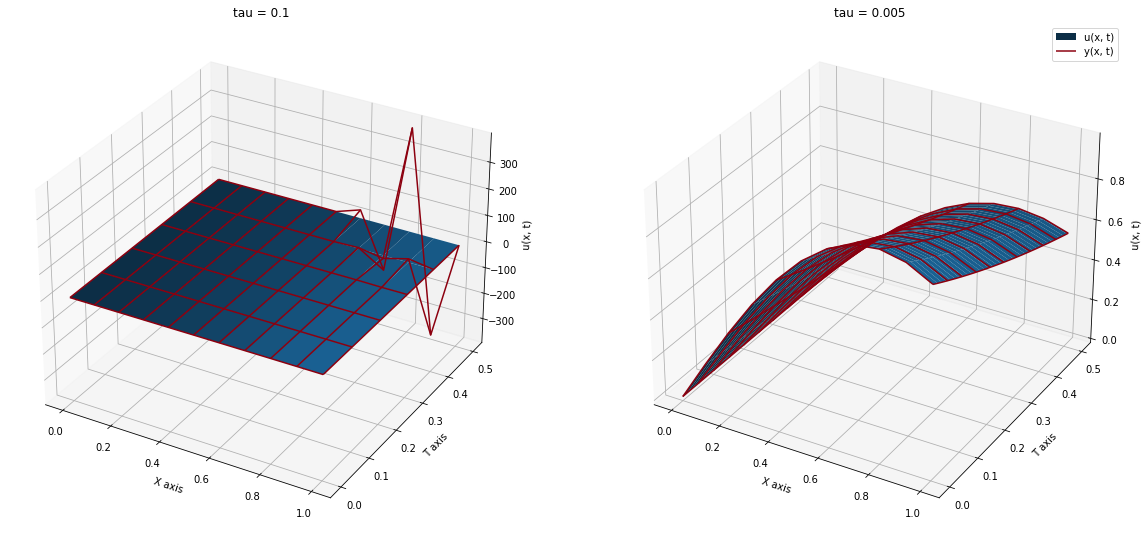

In [4]:
import matplotlib.pyplot as plt


x_h = np.arange(0, 1 + EPS, 0.1)
t_h_1 = np.arange(0, 0.5 + EPS, 0.1)
t_h_2 = np.arange(0, 0.5 + EPS, 0.005)

x_1 = np.array([[el] * len(t_h_1) for el in x_h])
x_2 = np.array([[el] * len(t_h_2) for el in x_h])

t_1 = np.array([t_h_1] * len(x_h))
t_2 = np.array([t_h_2] * len(x_h))

fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(121, projection='3d')
surf_1 = ax.plot_surface(x_1, t_1, u_1, label='u(x, t)')

wire_1 = ax.plot_wireframe(x_1, t_1, y_1, label='y(x, t)')
wire_1.set_edgecolor('xkcd:crimson')

ax.set_xlabel('X axis')
ax.set_ylabel('T axis')
ax.set_zlabel('u(x, t)')
ax.set_title('tau = 0.1')

my_cmap = plt.get_cmap('cool') 

ax = fig.add_subplot(122, projection='3d')
surf_2 = ax.plot_surface(x_2, t_2, u_2, label='u(x, t)')

wire_2 = ax.plot_wireframe(x_2, t_2, y_2, label='y(x, t)', rstride=2, cstride=10)
wire_2.set_edgecolor('xkcd:crimson')

ax.set_xlabel('X axis')
ax.set_ylabel('T axis')
ax.set_zlabel('u(x, t)')
ax.set_title('tau = 0.005') 


surf_1._facecolors2d=surf_1._facecolor3d 
surf_1._edgecolors2d=surf_1._edgecolor3d
surf_2._facecolors2d=surf_2._facecolor3d 
surf_2._edgecolors2d=surf_2._edgecolor3d
ax.legend()
plt.show()

# Выводы

Явная разностная схема становится неустойчивой при $\tau > \frac{h^2}{2}$, однако использование $\tau \le \frac{h^2}{2}$ позволяет существенно увеличить точность аппроксимации. Чисто неявная схема также обеспечивает адекватную точность приближения, однако схема Кранка-Николсон позволяет получить ещё меньшую погрешность при решении смешанной задачи для уравнения теплопроводности.